In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_moons

In [3]:
from sklearn.pipeline import Pipeline

In [4]:
X, y = make_moons(n_samples=100, noise=0.11, random_state=42)

In [5]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

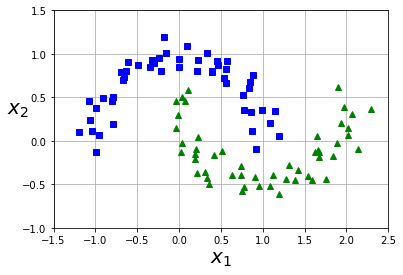

In [6]:
axes=[-1.5,2.5,-1,1.5]
plot_dataset(X,y,axes)

In [7]:
from sklearn.svm import SVC

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf",SVC(kernel='rbf',gamma=5,C=.001))
])

In [10]:
rbf_kernel_svm_clf.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf', SVC(C=0.001, gamma=5))])

In [11]:
def plot_predictions(clf, axes,g,c):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    plt.title("$gamma={}, C={}$".format(g,c), fontsize=18)

In [12]:
def plot_rbf_model_predictions(X,y,g,c):
    rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf",SVC(kernel='rbf',gamma=g,C=c))
        ])
    rbf_kernel_svm_clf.fit(X,y)
    plot_predictions(rbf_kernel_svm_clf,axes,g,c)    

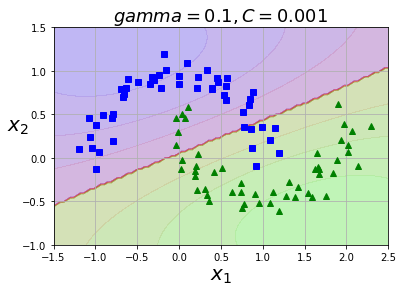

In [13]:
plot_dataset(X, y, axes)
plot_rbf_model_predictions(X,y,0.1,.001)

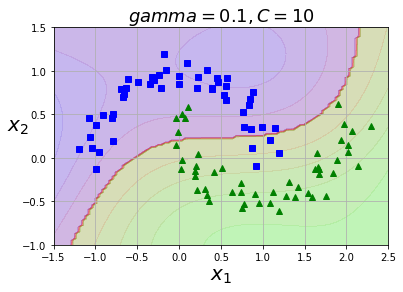

In [14]:
plot_dataset(X, y, axes)
plot_rbf_model_predictions(X,y,0.1,10)

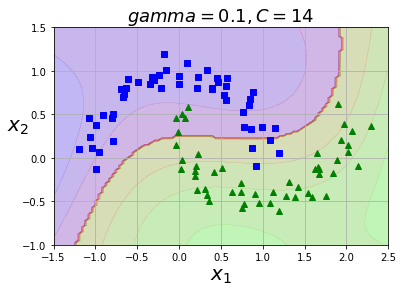

In [15]:
plot_dataset(X, y, axes)
plot_rbf_model_predictions(X,y,0.1,10^4)

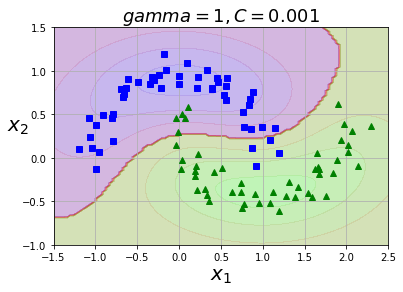

In [16]:
plot_dataset(X, y, axes)
plot_rbf_model_predictions(X,y,1,.001)

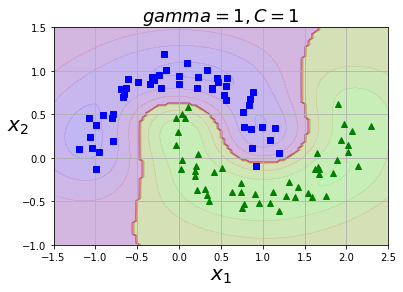

In [17]:
plot_dataset(X, y, axes)
plot_rbf_model_predictions(X,y,1,1)

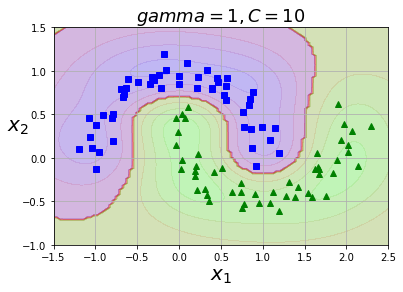

In [18]:
plot_dataset(X, y, axes)
plot_rbf_model_predictions(X,y,1,10)

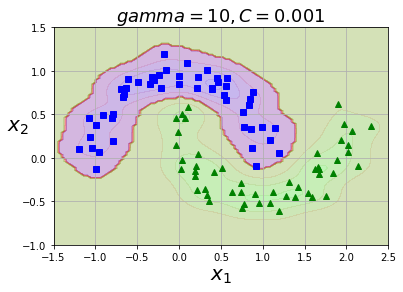

In [19]:
plot_dataset(X, y, axes)
plot_rbf_model_predictions(X,y,10,.001)

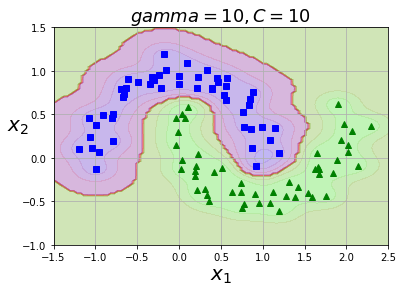

In [20]:
plot_dataset(X, y, axes)
plot_rbf_model_predictions(X,y,10,10)